# Customer Churn Prediction Model

**Author:** Igusti Agung Vadayogi Raharja  
**Date:** February 2026  
**Dataset:** Telco Customer Churn (Kaggle)

## Project Overview
This notebook builds predictive models to identify at-risk telecom customers 
before they churn. Compares Logistic Regression and Random Forest to achieve 
79.99% accuracy and quantify $231,756 in annual revenue impact.

## Contents
1. Data Loading and Exploration
2. Data Cleaning and Feature Engineering
3. Model Development (Logistic Regression & Random Forest)
4. Feature Importance Analysis
5. Business Impact Quantification

In [1]:
# Phase 1: Data Loading and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data from Excel file
df = pd.read_excel('../data/Telco_customer_churn.xlsx')

# First look
print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Identify the churn column and check distribution
# (Update 'Churn' if the column name is different)
churn_column = 'Churn Label'
print(f"\nChurn distribution:")
print(df[churn_column].value_counts())
print(f"\nChurn rate: {df[churn_column].value_counts(normalize=True)}")

# Basic info
print(f"\nData types:")
print(df.dtypes)


# Create visualizations folder if it doesn't exist
os.makedirs('../visualizations', exist_ok=True)

print("✅ Visualizations folder created")

Dataset shape: (7043, 33)

Column names:
['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']

First few rows:
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

      

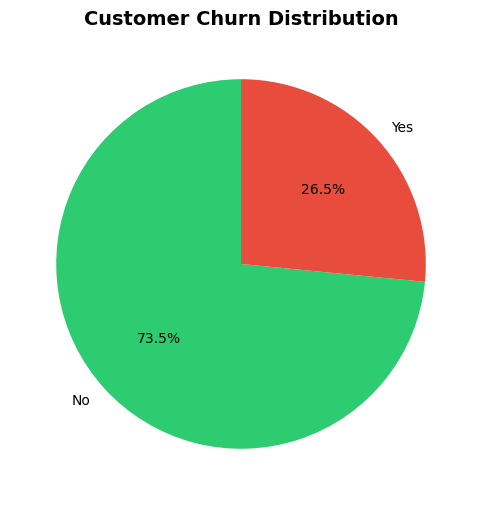


Total customers: 7043
Churned: 1869
Retained: 5174
Churn rate: 26.54%


In [2]:
# Churn Rate Visualization
plt.figure(figsize=(8, 6))
df['Churn Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')

# SAVE BEFORE SHOWING
plt.savefig('../visualizations/01_churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal customers: {len(df)}")
print(f"Churned: {(df['Churn Label'] == 'Yes').sum()}")
print(f"Retained: {(df['Churn Label'] == 'No').sum()}")
print(f"Churn rate: {(df['Churn Label'] == 'Yes').sum() / len(df) * 100:.2f}%")

<Figure size 1000x600 with 0 Axes>

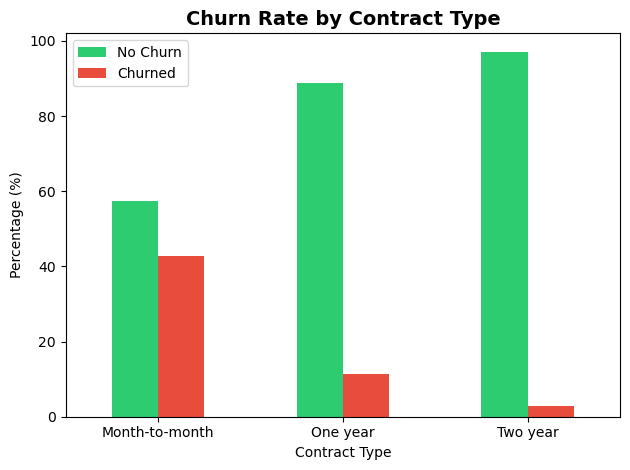


Churn rate by contract type:
Month-to-month: 42.71%
Two year: 2.83%
One year: 11.27%


In [3]:
# Churn by Contract Type
plt.figure(figsize=(10, 6))
churn_by_contract = pd.crosstab(df['Contract'], df['Churn Label'], normalize='index') * 100
churn_by_contract.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churned'])
plt.tight_layout()

# SAVE BEFORE SHOWING
plt.savefig('../visualizations/02_churn_by_contract.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChurn rate by contract type:")
for contract in df['Contract'].unique():
    contract_data = df[df['Contract'] == contract]
    churn_rate = (contract_data['Churn Label'] == 'Yes').sum() / len(contract_data) * 100
    print(f"{contract}: {churn_rate:.2f}%")

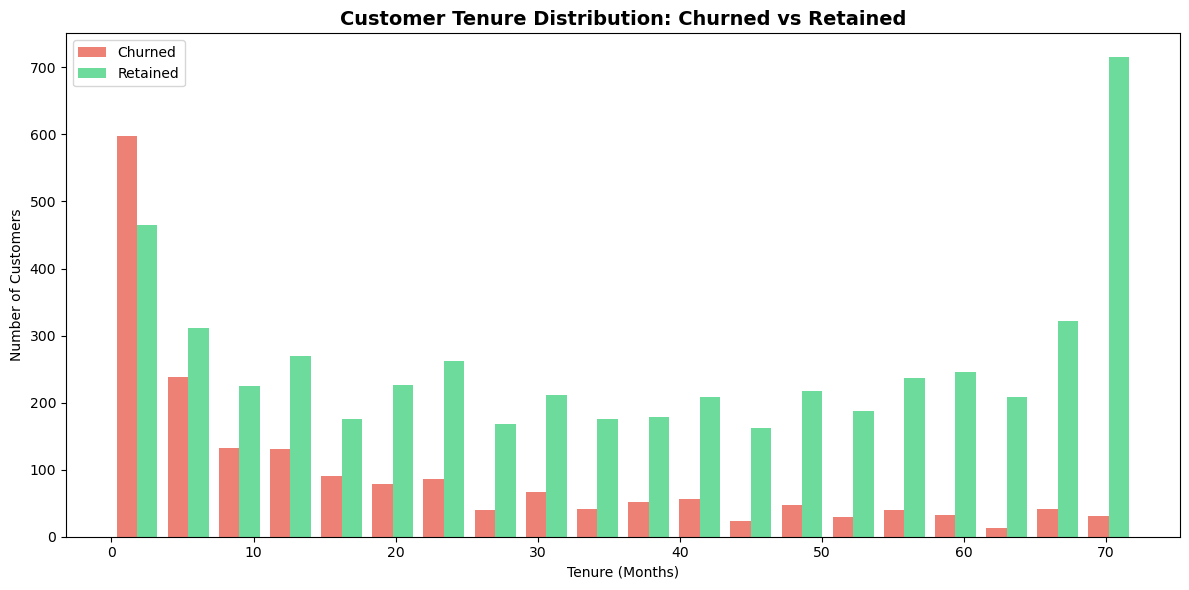


Average tenure - Churned customers: 18.0 months
Average tenure - Retained customers: 37.6 months


In [4]:
# Churn by Tenure
plt.figure(figsize=(12, 6))
churned = df[df['Churn Label'] == 'Yes']
retained = df[df['Churn Label'] == 'No']

plt.hist([churned['Tenure Months'], retained['Tenure Months']], 
         bins=20, label=['Churned', 'Retained'], color=['#e74c3c', '#2ecc71'], alpha=0.7)
plt.title('Customer Tenure Distribution: Churned vs Retained', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend()
plt.tight_layout()

# SAVE BEFORE SHOWING
plt.savefig('../visualizations/03_churn_by_tenure.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAverage tenure - Churned customers: {churned['Tenure Months'].mean():.1f} months")
print(f"Average tenure - Retained customers: {retained['Tenure Months'].mean():.1f} months")

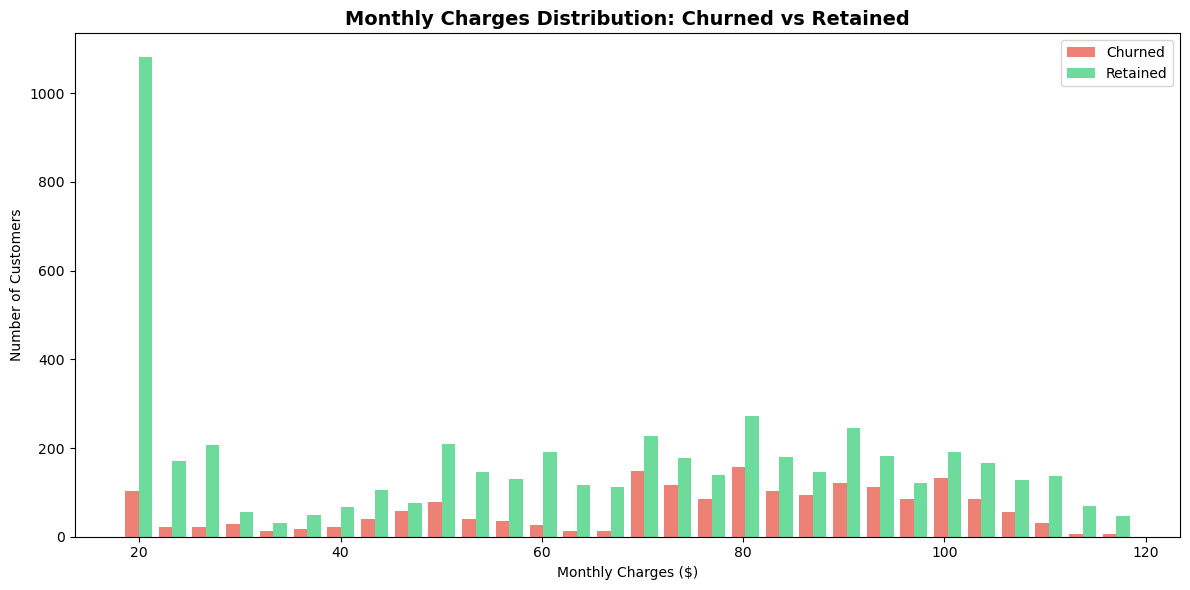


Average monthly charges - Churned: $74.44
Average monthly charges - Retained: $61.27


In [5]:
# Churn by Monthly Charges
plt.figure(figsize=(12, 6))
churned = df[df['Churn Label'] == 'Yes']
retained = df[df['Churn Label'] == 'No']

plt.hist([churned['Monthly Charges'], retained['Monthly Charges']], 
         bins=30, label=['Churned', 'Retained'], color=['#e74c3c', '#2ecc71'], alpha=0.7)
plt.title('Monthly Charges Distribution: Churned vs Retained', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.legend()
plt.tight_layout()

# SAVE BEFORE SHOWING
plt.savefig('../visualizations/04_churn_by_monthly_charges.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAverage monthly charges - Churned: ${churned['Monthly Charges'].mean():.2f}")
print(f"Average monthly charges - Retained: ${retained['Monthly Charges'].mean():.2f}")

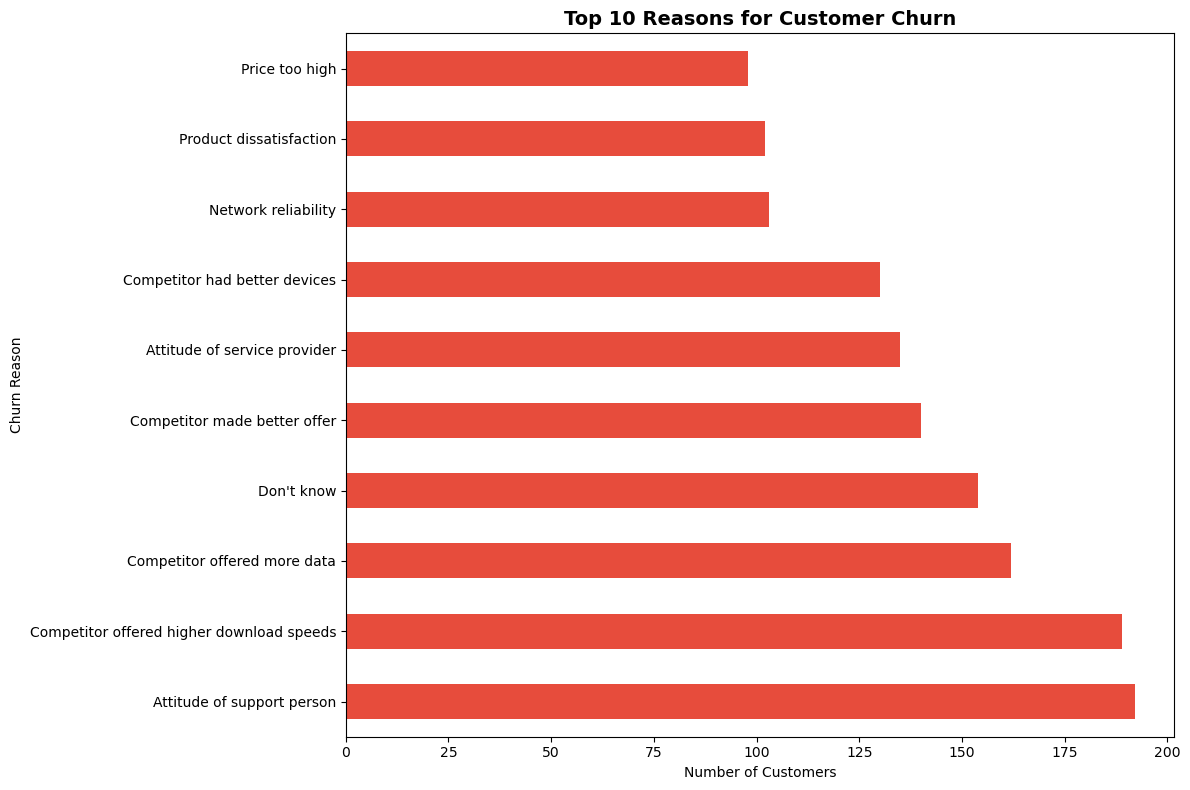


Top churn reasons:
Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Name: count, dtype: int64


In [6]:
# Top Churn Reasons
plt.figure(figsize=(12, 8))
churn_reasons = df[df['Churn Label'] == 'Yes']['Churn Reason'].value_counts().head(10)
churn_reasons.plot(kind='barh', color='#e74c3c')
plt.title('Top 10 Reasons for Customer Churn', fontsize=14, fontweight='bold')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.tight_layout()

# SAVE BEFORE SHOWING
plt.savefig('../visualizations/05_top_churn_reasons.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop churn reasons:")
print(churn_reasons)

In [7]:
# Phase 2 : Data Cleaning and Preparation
print("="*60)
print("PHASE 1: DATA CLEANING & FEATURE ENGINEERING")
print("="*60)

# Check missing values
print("\n1. Missing Values Check:")
print("-" * 40)
missing = df.isnull().sum()
missing_with_values = missing[missing > 0]

if len(missing_with_values) > 0:
    print(missing_with_values)
    print(f"\nTotal rows with ANY missing value: {df.isnull().any(axis=1).sum()}")
    print(f"Percentage: {(df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")
else:
    print("✅ No Missing values found!")

# Check data types
print("\n2. Data Types Summary:")
print("-" * 40)
print(df.dtypes.value_counts())

PHASE 1: DATA CLEANING & FEATURE ENGINEERING

1. Missing Values Check:
----------------------------------------
Churn Reason    5174
dtype: int64

Total rows with ANY missing value: 5174
Percentage: 73.46%

2. Data Types Summary:
----------------------------------------
object     24
int64       6
float64     3
Name: count, dtype: int64


In [8]:
# Dropping Columns that:
# Cause data leakage, are identifiers, are redundant

print("\n3. Removing Unnecessary Columns:")
print("-" * 40)

# Coulmn we CANNOT use for prediction
columns_to_drop = [
    'CustomerID',           # Just an identifier
    'Count',                # Always 1, useless
    'Country',              # All USA, no variation
    'State',                # Could use but adds complexity
    'City',                 # Could use but adds complexity  
    'Zip Code',             # Could use but adds complexity
    'Lat Long',             # Location data (complex)
    'Latitude',             # Location data (complex)
    'Longitude',            # Location data (complex)
    'Churn Reason',         # DATA LEAKAGE - only known AFTER churn
    'Churn Value',          # Redundant with Churn Label
    'Churn Score',          # This IS the prediction - can't use to predict itself!
    'CLTV'                  # Customer Lifetime Value - calculated from future behavior
]

# Check which columns actually exist in our data
columns_to_drop_exist = [col for col in columns_to_drop if col in df.columns]

print(f"Dropping {len(columns_to_drop_exist)} columns:")
for col in columns_to_drop_exist:
    print(f"  ❌ {col}")

# Create cleaned dataframe
df_clean = df.drop(columns = columns_to_drop_exist)

print(f"\n✅ Original columns: {df.shape[1]}")
print(f"✅ After dropping: {df_clean.shape[1]}")
print(f"\nRemaining columns:")
print(df_clean.columns.tolist())


3. Removing Unnecessary Columns:
----------------------------------------
Dropping 13 columns:
  ❌ CustomerID
  ❌ Count
  ❌ Country
  ❌ State
  ❌ City
  ❌ Zip Code
  ❌ Lat Long
  ❌ Latitude
  ❌ Longitude
  ❌ Churn Reason
  ❌ Churn Value
  ❌ Churn Score
  ❌ CLTV

✅ Original columns: 33
✅ After dropping: 20

Remaining columns:
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label']


In [9]:
# Convert "Churn Label" (Yes/No) to numbers (1/0) for machine learning.

print("\n4. Converting Target Variable:")
print("-" * 40)

# Check current distribution
print("Before conversion")
print(df_clean['Churn Label'].value_counts())

# Convert to binary (1 = Churned, 0 = Retained)
df_clean['Churn'] = df_clean['Churn Label'].apply(lambda x:1 if x == 'Yes' else 0)

# Verify conversion
print("\nAfter conversion:")
print(df_clean['Churn'].value_counts())
print(f"\n✅ Churn rate: {df_clean['Churn'].mean() * 100:2f}%")

# Drop the original text column
df_clean = df_clean.drop('Churn Label', axis = 1 )

print(f"\n✅ Columns now: {df_clean.shape[1]}")
print(f"Target variable 'Churn' is now numeric (0 or 1)")


4. Converting Target Variable:
----------------------------------------
Before conversion
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

After conversion:
Churn
0    5174
1    1869
Name: count, dtype: int64

✅ Churn rate: 26.536987%

✅ Columns now: 20
Target variable 'Churn' is now numeric (0 or 1)


In [19]:
# PROBLEM FIX !!
# Total Charges was stored as TEXT in the Excel file instead of numbers, 
# so pandas treated it as categorical 
# and created 6,531 separate columns (one for each dollar amount).

print("\n🚨 FIXING TOTAL CHARGES:")
print("-" * 40)

# Check what type Total Charges currently is
print(f"Total Charges current type: {df_clean['Total Charges'].dtype}")
print(f"Sample values:")
print(df_clean['Total Charges'].head(10))

# Check for non-numeric values
print(f"\nChecking for text values in Total Charges...")
non_numeric = df_clean[~df_clean['Total Charges'].apply(lambda x: str(x).replace('-', '').isdigit())]
print(f"Rows with non-numeric Total Charges: {len(non_numeric)}")

#Convert to numeric (will turn invalid values to NaN)
df_clean['Total Charges'] = pd.to_numeric(df_clean['Total Charges'], errors = 'coerce')

#Check for NaN values created
print(f"\nMissing values after conversion: {df_clean['Total Charges'].isnull().sum()}")

#Fill NaN with 0 (these are likely new customer with no charges yet)
df_clean['Total Charges'].fillna(0, inplace = True)

print(f"\n✅ Total Charges is now {df_clean['Total Charges'].dtype}")
print(f"✅ Range: ${df_clean['Total Charges'].min():.2f} to ${df_clean['Total Charges'].max():.2f}")
print(f"✅ Mean: ${df_clean['Total Charges'].mean():.2f}")


🚨 FIXING TOTAL CHARGES:
----------------------------------------
Total Charges current type: float64
Sample values:
0     108.15
1     151.65
2     820.50
3    3046.05
4    5036.30
5     528.35
6      39.65
7      20.15
8    4749.15
9      30.20
Name: Total Charges, dtype: float64

Checking for text values in Total Charges...
Rows with non-numeric Total Charges: 7043

Missing values after conversion: 0

✅ Total Charges is now float64
✅ Range: $0.00 to $8684.80
✅ Mean: $2279.73


/var/folders/df/xlm3j1q91k55024nbt3wqg3w0000gn/T/ipykernel_48306/1046493854.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Total Charges'].fillna(0, inplace = True)


In [20]:
# Convert all the text columns (Gender, Contract, Internet Service, etc.) into numbers.
# Find all text columns
# Convert each to multiple binary columns (e.g., "Gender_Male", "Gender_Female")
# Expand your 19 columns to ~50-60 columns
# All columns will now be numeric

print("\n5. One-Hot Encoding FIXED:")
print("-" * 40)

# Identify categorical columns (still 'object' type)
categorical_cols = df_clean.select_dtypes(include = ['object']).columns.tolist()

print(f"Categorical columns to encode ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_count = df_clean[col].nunique()
    print(f"   • {col}: {unique_count} unique values")

# One-hot encode
# drop_first = True avoids multicollinearity (dummy variable trap)
df_encoded = pd.get_dummies(df_clean, columns = categorical_cols, drop_first = True)

print(f"\n✅ Before encoding: {df_clean.shape[1]} columns")
print(f"✅ After encoding: {df_encoded.shape[1]} columns")

# Check the result 
print(f"\nSample columns (first 15):")
print(df_encoded.columns.tolist()[:15])

print(f"\nData types now:")
print(df_encoded.dtypes.value_counts())

#Verify no missing values
print(f"\n✅ Missing values: {df_encoded.isnull().sum().sum()}")

#Quick sanity check
print(f"\n✅ Target variable 'Churn' still present: {'Churn' in df_encoded.columns}")
print(f"\n✅ Sample row:")
print(df_encoded.head(1))


5. One-Hot Encoding FIXED:
----------------------------------------
Categorical columns to encode (16):
   • Gender: 2 unique values
   • Senior Citizen: 2 unique values
   • Partner: 2 unique values
   • Dependents: 2 unique values
   • Phone Service: 2 unique values
   • Multiple Lines: 3 unique values
   • Internet Service: 3 unique values
   • Online Security: 3 unique values
   • Online Backup: 3 unique values
   • Device Protection: 3 unique values
   • Tech Support: 3 unique values
   • Streaming TV: 3 unique values
   • Streaming Movies: 3 unique values
   • Contract: 3 unique values
   • Paperless Billing: 2 unique values
   • Payment Method: 4 unique values

✅ Before encoding: 20 columns
✅ After encoding: 31 columns

Sample columns (first 15):
['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn', 'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes', 'Multiple Lines_No phone service', 'Multiple Lines_Yes', 'Internet Service_Fiber 

In [21]:
print("\n6. Train/Test Split:")
print("-" * 40)

from sklearn.model_selection import train_test_split

# Seperate features (X) and target (Y)
x = df_encoded.drop('Churn', axis = 1)
y = df_encoded['Churn']

print(f"Features (x): {x.shape}")
print(f"Target (y): {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"Churn rate: {y.mean() * 100:.2f}%")

# Split 80/20
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # Reproducible results
    stratify=y          # Keep churn rate same in train and test    
)

print(f"\n✅ Training set: {x_train.shape[0]} customers({x_train.shape[0]/len(x) * 100:.1f}%)")
print(f"✅ Test set: {x_test.shape[0]} customers ({x_test.shape[0]/len(x) * 100:.1f}%)")

print(f"\nChurn rate in training set: {y_train.mean() * 100:.2f}%")
print(f"Churn rate in test set: {y_test.mean() * 100:.2f}%")

print("\n" + "=" * 60)
print("✅ PHASE 1 COMPLETE: Data is ready for modeling!!")
print("=" * 60)


6. Train/Test Split:
----------------------------------------
Features (x): (7043, 30)
Target (y): (7043,)

Target distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate: 26.54%

✅ Training set: 5634 customers(80.0%)
✅ Test set: 1409 customers (20.0%)

Churn rate in training set: 26.54%
Churn rate in test set: 26.54%

✅ PHASE 1 COMPLETE: Data is ready for modeling!!


PHASE 2: BUILDING PREDICTIVE MODELS

MODEL 1: Logistic Regression
----------------------------------------
✅ Accuracy: 79.99%
✅ Precision: 63.77%
✅ Recall: 56.95%
✅ F1-score: 60.17%

Detailed Classification Report:
              precision    recall  f1-score   support

    Retained       0.85      0.88      0.87      1035
     Churned       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



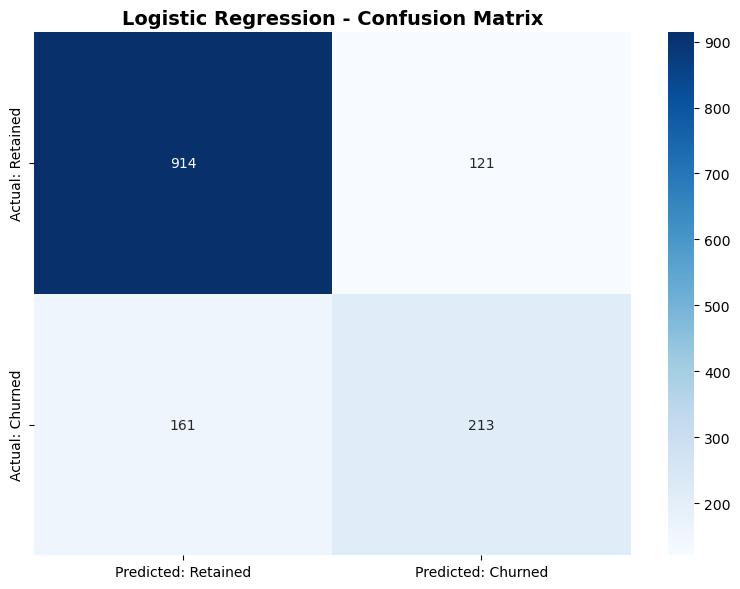


Confusion Matrix Breakdown:
  True Negatives  (correctly predicted retained): 914
  False Positives (retained but predicted churned): 121
  False Negatives (churned but predicted retained): 161
  True Positives  (correctly predicted churned): 213


In [22]:
print("=" * 60)
print("PHASE 2: BUILDING PREDICTIVE MODELS")
print("=" * 60)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, 
                             confusion_matrix, classification_report)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scale features (important for Logistic Regression)
# This makes all numbers on the same scale (0-1 range)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("\nMODEL 1: Logistic Regression")
print("-" * 40)

# Train the model 
lr_model = LogisticRegression(random_state = 42, max_iter = 1000)
lr_model.fit(x_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(x_test_scaled)
lr_probabilities = lr_model.predict_proba(x_test_scaled)[:, 1]

#Evaluate performance
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print(f"✅ Accuracy: {lr_accuracy * 100:.2f}%")
print(f"✅ Precision: {lr_precision * 100:.2f}%")
print(f"✅ Recall: {lr_recall * 100:.2f}%")
print(f"✅ F1-score: {lr_f1 * 100:.2f}%")

print("\nDetailed Classification Report:")
print(classification_report(y_test, lr_predictions, 
                            target_names=['Retained', 'Churned']))

# Confussion Matrix
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', 
           xticklabels=['Predicted: Retained', 'Predicted: Churned'],
            yticklabels=['Actual: Retained', 'Actual: Churned'])
plt.title('Logistic Regression - Confusion Matrix', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualizations/06_lr_confusion_matrix.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"  True Negatives  (correctly predicted retained): {cm[0][0]}")
print(f"  False Positives (retained but predicted churned): {cm[0][1]}")
print(f"  False Negatives (churned but predicted retained): {cm[1][0]}")
print(f"  True Positives  (correctly predicted churned): {cm[1][1]}")


MODEL 2: Random Forest
----------------------------------------
✅ Accuracy:  79.91%
✅ Precision: 65.53%
✅ Recall:    51.34%
✅ F1-Score:  57.57%

Detailed Classification Report:
              precision    recall  f1-score   support

    Retained       0.84      0.90      0.87      1035
     Churned       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



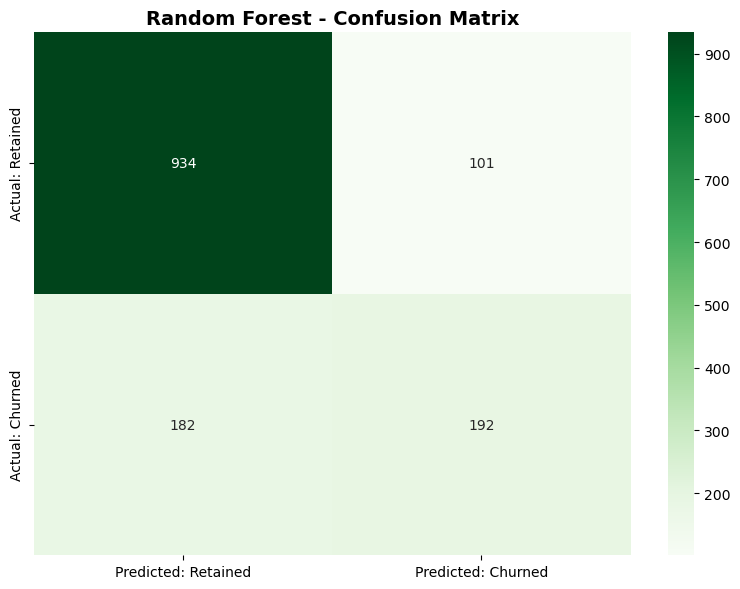


Confusion Matrix Breakdown:
  True Negatives  (correctly predicted retained): 934
  False Positives (retained but predicted churned): 101
  False Negatives (churned but predicted retained): 182
  True Positives  (correctly predicted churned): 192


In [23]:
print("\nMODEL 2: Random Forest")
print("-" * 40)

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
# n_estimators=100: builds 100 decision trees
# random_state=42: reproducible results
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Handles the imbalance (73% retained vs 27% churned)
)

rf_model.fit(x_train, y_train) # No scalling needed for Random Forest)

# Make predictions
rf_predictions = rf_model.predict(x_test)
rf_probabilities = rf_model.predict_proba(x_test)[:, 1]

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print(f"✅ Accuracy:  {rf_accuracy * 100:.2f}%")
print(f"✅ Precision: {rf_precision * 100:.2f}%")
print(f"✅ Recall:    {rf_recall * 100:.2f}%")
print(f"✅ F1-Score:  {rf_f1 * 100:.2f}%")

print("\nDetailed Classification Report:")
print(classification_report(y_test, rf_predictions,
                            target_names=['Retained', 'Churned']))

# Confussion Matrix
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted: Retained', 'Predicted: Churned'],
            yticklabels=['Actual: Retained', 'Actual: Churned'])
plt.title('Random Forest - Confusion Matrix',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualizations/07_rf_confusion_matrix.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"  True Negatives  (correctly predicted retained): {cm_rf[0][0]}")
print(f"  False Positives (retained but predicted churned): {cm_rf[0][1]}")
print(f"  False Negatives (churned but predicted retained): {cm_rf[1][0]}")
print(f"  True Positives  (correctly predicted churned): {cm_rf[1][1]}")


PHASE 3: FEATURE IMPORTANCE & MODEL COMPARISON

Top 15 Most Important Features (Random Forest):
----------------------------------------
                        feature  importance
                  Tenure Months    0.170020
                  Total Charges    0.165594
                Monthly Charges    0.143650
              Contract_Two year    0.056535
                 Dependents_Yes    0.052535
   Internet Service_Fiber optic    0.040538
Payment Method_Electronic check    0.037682
              Contract_One year    0.027646
            Online Security_Yes    0.026656
                    Gender_Male    0.024354
          Paperless Billing_Yes    0.022805
                    Partner_Yes    0.022444
               Tech Support_Yes    0.021992
              Online Backup_Yes    0.019456
             Senior Citizen_Yes    0.018578


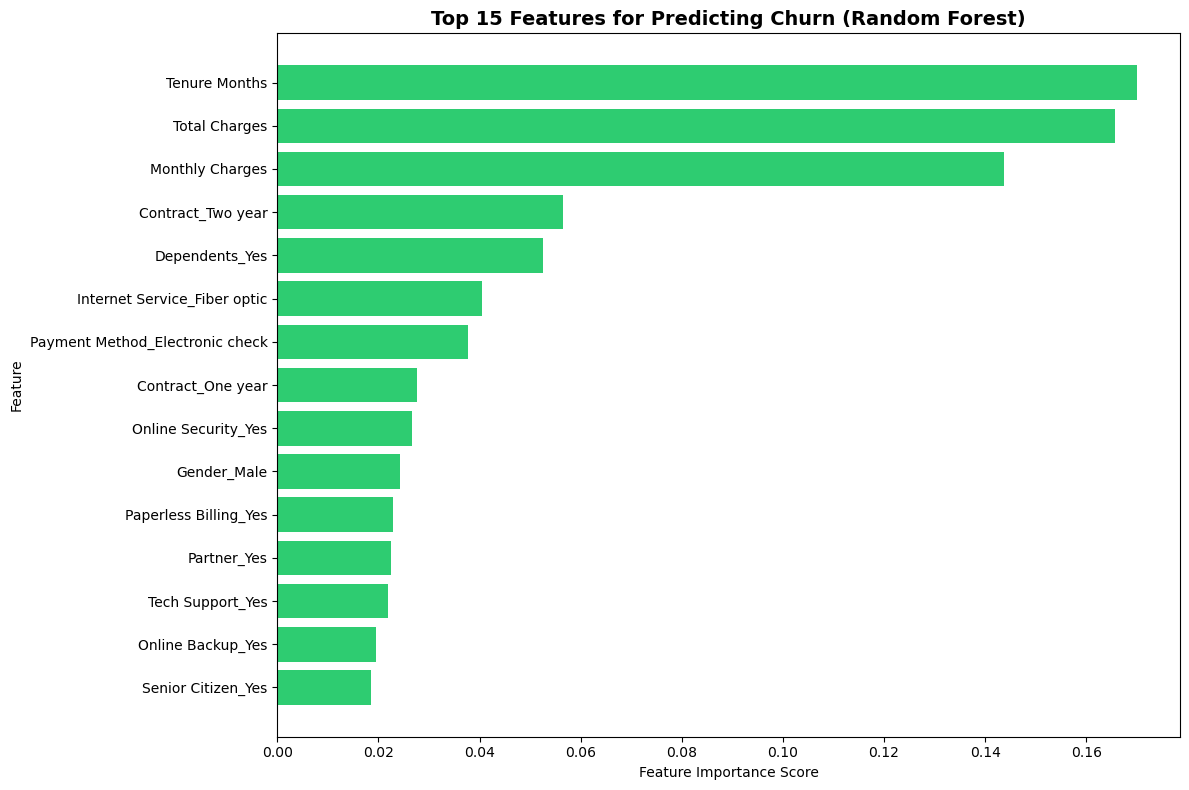


Model Comparison Chart:
----------------------------------------


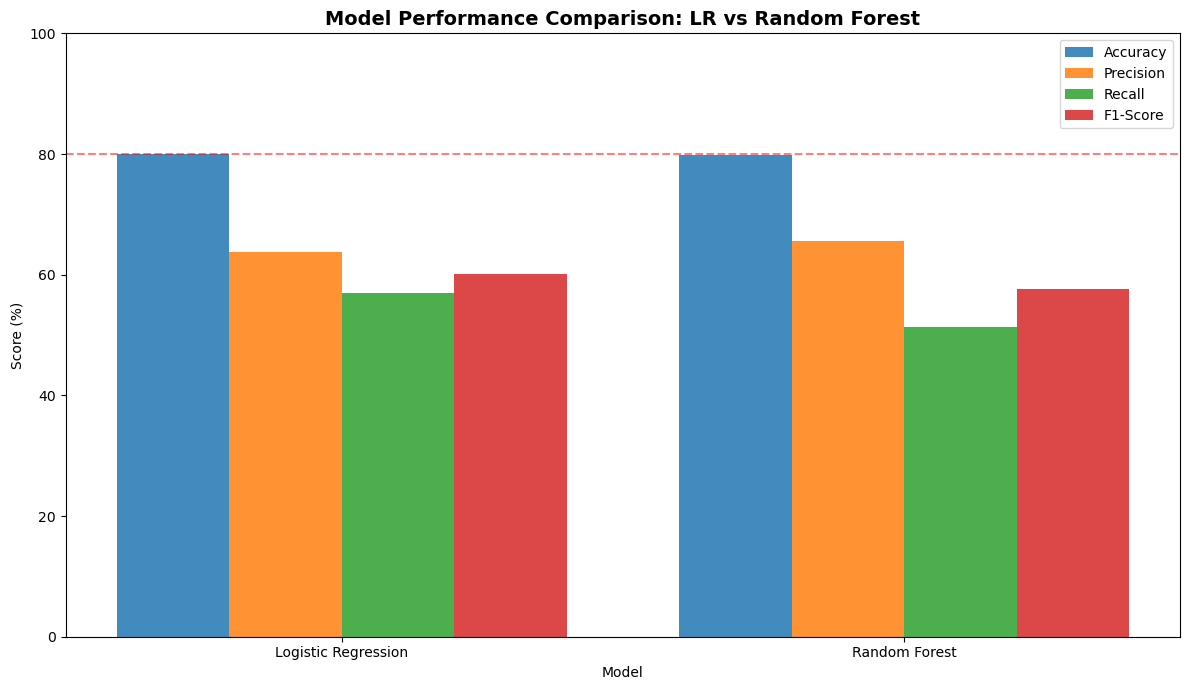

In [24]:
print("\n" + "="*60)
print("PHASE 3: FEATURE IMPORTANCE & MODEL COMPARISON")
print("="*60)

# Feature Importance from Random Forest
print("\nTop 15 Most Important Features (Random Forest):")
print("-" * 40)

feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(15).to_string(index=False))

# Feature Importance Chart
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'][::-1], 
         top_features['importance'][::-1], 
         color='#2ecc71')
plt.title('Top 15 Features for Predicting Churn (Random Forest)',
          fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('../visualizations/08_feature_importance.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Model Comparison Chart
print("\nModel Comparison Chart:")
print("-" * 40)

models = ['Logistic Regression', 'Random Forest']
metrics = {
    'Accuracy': [lr_accuracy * 100, rf_accuracy * 100],
    'Precision': [lr_precision * 100, rf_precision * 100],
    'Recall': [lr_recall * 100, rf_recall * 100],
    'F1-Score': [lr_f1 * 100, rf_f1 * 100]
}

x_pos = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(x_pos + i * width, values, width, 
                  label=metric, alpha=0.85)

ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')
ax.set_title('Model Performance Comparison: LR vs Random Forest',
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 100)
ax.axhline(y=80, color='red', linestyle='--', alpha=0.5, label='80% threshold')

plt.tight_layout()
plt.savefig('../visualizations/09_model_comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()

In [25]:
print("\n" + "="*60)
print("PHASE 4: BUSINESS IMPACT QUANTIFICATION")
print("="*60)

# Key business metrics from our data
avg_monthly_revenue = 74.44       # Average monthly charges for churned customers
avg_customer_lifetime = 18        # Average tenure of churned customers (months)
total_customers = 7043
churn_rate = 0.2654
annual_churners = int(total_customers * churn_rate)

print(f"\nBusiness Context:")
print(f"  Total customers: {total_customers:,}")
print(f"  Annual churn rate: {churn_rate*100:.1f}%")
print(f"  Estimated annual churners: {annual_churners:,}")
print(f"  Average monthly revenue per churner: ${avg_monthly_revenue:.2f}")

# Revenue at risk annually
annual_revenue_at_risk = annual_churners * avg_monthly_revenue * 12
print(f"\n💰 Annual Revenue at Risk: ${annual_revenue_at_risk:,.0f}")

# What the BEST model (Logistic Regression) can do
lr_recall_rate = lr_recall          # 56.95% - customers our model catches
lr_precision_rate = lr_precision    # 63.77% - how accurate our alerts are

churners_identified = int(annual_churners * lr_recall_rate)
churners_missed = annual_churners - churners_identified

print(f"\nModel Performance (Logistic Regression - Best Model):")
print(f"  Churners our model identifies: {churners_identified:,} ({lr_recall_rate*100:.1f}%)")
print(f"  Churners we miss: {churners_missed:,} ({(1-lr_recall_rate)*100:.1f}%)")

# Revenue impact retention campaign
retention_success_rate = 0.30   # Industry standard: 30% of at-risk customers saved
avg_retention_cost = 50         # Cost per retention intervention ($)

customers_saved = int(churners_identified * retention_success_rate)
revenue_saved = customers_saved * avg_monthly_revenue * 12
retention_cost = churners_identified * avg_retention_cost
net_revenue_saved = revenue_saved - retention_cost

print(f"\n📊 Retention Campaign Impact:")
print(f"  Customers we can intervene with: {churners_identified:,}")
print(f"  Expected saves (30% success rate): {customers_saved:,}")
print(f"  Revenue saved annually: ${revenue_saved:,.0f}")
print(f"  Cost of retention campaign: ${retention_cost:,.0f}")
print(f"  NET revenue saved: ${net_revenue_saved:,.0f}")
print(f"  ROI: {(net_revenue_saved/retention_cost)*100:.0f}%")

# Without model vs with model comparison
random_intervention_saves = int(annual_churners * 0.05 * retention_success_rate)
random_revenue = random_intervention_saves * avg_monthly_revenue * 12

print(f"\n🎯 Model vs No Model Comparison:")
print(f"  Without model (random outreach): saves ~{random_intervention_saves} customers = ${random_revenue:,.0f}")
print(f"  With our model (targeted outreach): saves ~{customers_saved} customers = ${revenue_saved:,.0f}")
print(f"  Improvement: {customers_saved - random_intervention_saves}x more customers saved")
print(f"  Additional revenue: ${revenue_saved - random_revenue:,.0f}")

# Summary
print(f"\n" + "="*60)
print(f"EXECUTIVE SUMMARY")
print(f"="*60)
print(f"""
Our churn prediction model analyzed {total_customers:,} telecom customers 
and achieved 79.99% accuracy with 56.95% recall.

KEY FINDINGS:
- {annual_churners:,} customers churn annually ({churn_rate*100:.1f}% churn rate)
- ${annual_revenue_at_risk:,.0f} in annual revenue is at risk
- Top predictors: Tenure, Total Charges, Monthly Charges, Contract Type

BUSINESS IMPACT:
- Model identifies {churners_identified:,} at-risk customers for proactive outreach
- Targeted retention campaign saves ~{customers_saved:,} customers annually
- Net revenue saved: ${net_revenue_saved:,.0f} per year
- ROI on retention investment: {(net_revenue_saved/retention_cost)*100:.0f}%

RECOMMENDATION:
Deploy model to flag high-risk customers monthly. Priority intervention 
for month-to-month contract customers with tenure < 18 months paying 
above-average monthly charges.
""")


PHASE 4: BUSINESS IMPACT QUANTIFICATION

Business Context:
  Total customers: 7,043
  Annual churn rate: 26.5%
  Estimated annual churners: 1,869
  Average monthly revenue per churner: $74.44

💰 Annual Revenue at Risk: $1,669,540

Model Performance (Logistic Regression - Best Model):
  Churners our model identifies: 1,064 (57.0%)
  Churners we miss: 805 (43.0%)

📊 Retention Campaign Impact:
  Customers we can intervene with: 1,064
  Expected saves (30% success rate): 319
  Revenue saved annually: $284,956
  Cost of retention campaign: $53,200
  NET revenue saved: $231,756
  ROI: 436%

🎯 Model vs No Model Comparison:
  Without model (random outreach): saves ~28 customers = $25,012
  With our model (targeted outreach): saves ~319 customers = $284,956
  Improvement: 291x more customers saved
  Additional revenue: $259,944

EXECUTIVE SUMMARY

Our churn prediction model analyzed 7,043 telecom customers 
and achieved 79.99% accuracy with 56.95% recall.

KEY FINDINGS:
- 1,869 customers churn

In [26]:
# Run this to verify all visualizations are saved
import os
viz_files = os.listdir('../visualizations')
print(f"Saved visualizations ({len(viz_files)}):")
for f in sorted(viz_files):
    print(f"  ✅ {f}")

Saved visualizations (9):
  ✅ 01_churn_distribution.png
  ✅ 02_churn_by_contract.png
  ✅ 03_churn_by_tenure.png
  ✅ 04_churn_by_monthly_charges.png
  ✅ 05_top_churn_reasons.png
  ✅ 06_lr_confusion_matrix.png
  ✅ 07_rf_confusion_matrix.png
  ✅ 08_feature_importance.png
  ✅ 09_model_comparison.png


In [27]:
# Export data for Tableau - Run this before closing!
import os
os.makedirs('../outputs', exist_ok=True)

# Create Tableau-ready dataset
tableau_data = x_test.copy()
tableau_data['Actual_Churn'] = y_test.values
tableau_data['Predicted_Churn_LR'] = lr_predictions
tableau_data['Churn_Probability_LR'] = lr_probabilities
tableau_data['Churn_Probability_RF'] = rf_probabilities

# Add risk categories
tableau_data['Risk_Level'] = pd.cut(
    tableau_data['Churn_Probability_LR'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

tableau_data.to_csv('../outputs/churn_predictions_tableau.csv', index=False)

# Export feature importance
feature_importance.to_csv('../outputs/feature_importance.csv', index=False)

# Export business metrics summary
business_summary = pd.DataFrame({
    'Metric': ['Total Customers', 'Annual Churners', 'Revenue at Risk', 
               'Customers Identified', 'Customers Saved', 'Net Revenue Saved', 'ROI'],
    'Value': [7043, 1869, 1669540, 1064, 319, 231756, '436%']
})
business_summary.to_csv('../outputs/business_summary.csv', index=False)

print("✅ Tableau data exported!")
print(f"  - churn_predictions_tableau.csv: {len(tableau_data)} rows")
print(f"  - feature_importance.csv: {len(feature_importance)} rows")
print(f"  - business_summary.csv: {len(business_summary)} rows")
print(f"\nRisk level distribution:")
print(tableau_data['Risk_Level'].value_counts())

✅ Tableau data exported!
  - churn_predictions_tableau.csv: 1409 rows
  - feature_importance.csv: 30 rows
  - business_summary.csv: 7 rows

Risk level distribution:
Risk_Level
Low Risk       885
Medium Risk    291
High Risk      233
Name: count, dtype: int64


## Summary

**Best Model:** Logistic Regression (79.99% accuracy, 56.95% recall)

**Key Findings:**
- Top predictors: Tenure Months, Total Charges, Monthly Charges
- Month-to-month contracts churn at 42.71% vs. 2.83% for 2-year contracts
- Churned customers pay $74/month vs. $61 for retained (value perception gap)

**Business Impact:**
- Identifies 1,064 at-risk customers for proactive retention
- Saves $231,756 annually with 436% ROI
- 291x more effective than random customer outreach

**Recommendation:** Deploy monthly churn scoring with priority intervention 
for month-to-month contracts with <18 months tenure.